## Цель практической работы

* закрепить на практике знания про метод опорных векторов: какая у метода функция потерь и как он обучается;

* отточить понятие разделяющей прямой и разделяющей полосы метода.

## Что входит в практическую работу

*  реализация функции потерь метода опорных векторов;
*  реализация градиента функции потерь;
*  применение градиентного спуска для обучения модели;
*  тестирование метода на данных;
*  визуализация ошибки;
*  визуализация разделяющей прямой и разделяющей полосы.

Для закрепления полученных знаний предлагаем вам обучить SVM методом стохастического градиентного спуска, причём все шаги реализовать самостоятельно, без использования готовых моделей из библиотек python.

Обратите внимание, что эту практическую работу не нужно сдавать на проверку. Выполните все пункты задания и сверьтесь с ответами ниже.

Мы работаем с выборкой о некоторых объектах недвижимости. Пусть у нас есть две анонимизированные числовые характеристики объектов: f1 и f2. Необходимо решить задачу классификации: будет ли сдан в аренду в следующем квартале объект недвижимости (класс 1), или нет (класс 0).

Загрузите данные и визуализируйте их.

C:\Users\advok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


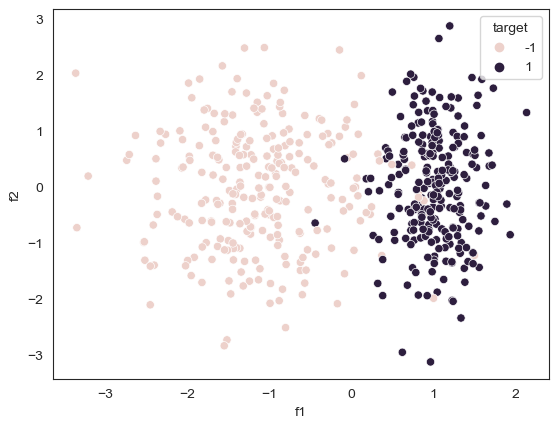

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

Data = pd.read_csv("Realty.csv")
X = Data[['f1','f2']]
y = Data['target'] 

sns.set_style('white')
sns.scatterplot(X['f1'], X['f2'], hue = y);

**Задание 1.** Напишите функцию для вычисления функции потерь SVM (hinge-loss):

$$L = \frac12 ||w||^2 + \frac1n\cdot C\cdot \sum\limits_{i=1}^n max(0, 1 - y_i\cdot (w_0 + (w,x_i)))$$

Можно вычислить второе слагаемое в векторном виде: $\frac1n\cdot C\cdot max(0, 1 - y \cdot (Xw + w_0))$

Функция должна возвращать значение функции потерь.

In [ ]:
def compute_cost(X, y, w, C):
    '''
    X - матрица объект-признак (с единичным столбцом)
    y - вектор целевой переменной
    w - вектор весов
    С - параметр регуляризации
    '''

    # Ваш код здесь

    return cost

**Задание 2.** Напишите функцию для вычисления градиента функции потерь на одном объекте по формуле:

$\nabla Q_i = w$, если $max(0, 1-y_i\cdot(w,x_i))=0$

и 

$\nabla Q_i = w - Cx_iy_i$, иначе.



Для веса $w_0$ формулы следующие:

$\frac{\partial Q_i}{\partial w_0} = 0$, если $max(0, 1-y_i\cdot(w,x_i))=0$

и 

$\frac{\partial Q_i}{\partial w_0} = - Cx_iy_i$, иначе.

После вычисления сконкатенируйте градиент по весу $w_0$ с градиентом по остальным весам.

Функция должна вернуть вектор $-$ градиент.

In [ ]:
def calculate_cost_gradient(x_input, y_input, w, C):
    '''
    x_input - признаки объекта
    y_input - ответ на объекте
    w - вектор весов 
    C - параметр регуляризации
    '''

    w0 = w[0]
    w = w[1:]
    
    # Ваш код здесь

    return dw

Используйте написанный вами стохастический градиентный спуск из ноутбука, находящегося в модуле «Логистическая регрессия».

In [ ]:
def stochastic_gradient_descent(X, y, params, learning_rate, iterations, C):

    params = np.random.rand(X.shape[1]+1)

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        ind = random.sample(range(X.shape[0]),1)

        params = params - learning_rate * calculate_cost_gradient(X[ind], y[ind], params, C) 
        params = params.ravel() 
        cost_track[i] = compute_cost(X, y, params, C)

    return cost_track, params

Возьмите функцию получения предсказания из ноутбука, находящегося в модуле «Логистическая регрессия». Модифицируйте её с учетом особенностей задачи.

In [ ]:
def predict(X, params):

    return np.sign(X @ params[1:] + params[0])

Создайте начальный вектор параметров (весов) модели и заполните его нулями.

Задайте количество итераций стохастического градиентного спуска и градиентный шаг.

In [ ]:
params = np.zeros((X.shape[1],1))

iterations = 1500
learning_rate = 0.03
C = 2

**Задание 3.** Обучите модель методом стохастического градиентного спуска (вызовите написанную функцию).

Выведите на экран найденный вектор весов и нарисуйте график, отражающий, как убывает ошибка в зависимости от номера итерации (подпишите оси и добавьте название к графику).

In [ ]:
# Ваш код здесь

**Задание 4.** Сделайте предсказание обученной модели на всех данных X.

Вычислите долю правильных ответов модели на всех данных X (используйте метрику accuracy).

In [ ]:
from sklearn.metrics import accuracy_score

# Ваш код здесь

**Задание 5**. Визуализируйте данные для задачи (скопируйте код визуализации из начала ноутбука), а также отобразите на нём разделяющую прямую и разделяющую полосу метода. 

In [ ]:
# Ваш код здесь

|

|

|

|

|

Надеемся, что вы выполнили всё верно! Сверьтесь с правильными ответами.

В этом задании мы работаем с выборкой о некоторых объектах недвижимости. У нас есть две анонимизированные числовые характеристики объектов: f1 и f2. Необходимо решить задачу классификации: будет ли сдан в аренду в следующем квартале объект недвижимости (класс 1), или нет (класс 0).

Загрузим данные и визуализируем их.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


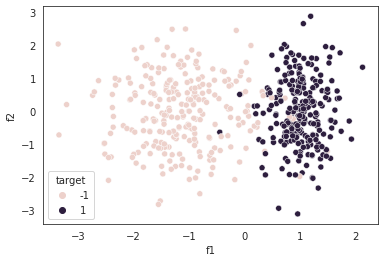

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Data = pd.read_csv("Realty.csv")
X = Data[['f1','f2']]
y = Data['target'] 

sns.set_style('white')
sns.scatterplot(X['f1'], X['f2'], hue = y);

**Задание 1.** Напишите функцию для вычисления функции потерь SVM (hinge-loss):

$$L = \frac12 ||w||^2 + \frac1n\cdot C\cdot \sum\limits_{i=1}^n max(0, 1 - y_i\cdot (w_0 + (w,x_i)))$$

Можно вычислить второе слагаемое в векторном виде: $\frac1n\cdot C\cdot max(0, 1 - y \cdot (Xw + w_0))$

Функция должна возвращать значение функции потерь.

In [3]:
50 ** 0.5

7.0710678118654755

In [ ]:
def compute_cost(X, y, w, C):
    '''
    X - матрица объект-признак (с единичным столбцом)
    y - вектор целевой переменной
    w - вектор весов
    С - параметр регуляризации
    '''

    n = X.shape[0]
    w0 = w[0]
    w = w[1:]

    distances = 1 - y * (np.dot(X, w) + w0)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = C * (np.sum(distances) / n)
    
    # calculate cost
    cost = 1 / 2 * np.dot(w, w) + hinge_loss
    return cost

**Задание 2.** Напишите функцию для вычисления градиента функции потерь на одном объекте по формуле:

$\nabla Q_i = w$, если $max(0, 1-y_i\cdot(w,x_i))=0$

и 

$\nabla Q_i = w - Cx_iy_i$, иначе.



Для веса $w_0$ формулы следующие:

$\frac{\partial Q_i}{\partial w_0} = 0$, если $max(0, 1-y_i\cdot(w,x_i))=0$

и 

$\frac{\partial Q_i}{\partial w_0} = - Cx_iy_i$, иначе.

После вычисления сконкатенируйте градиент по весу $w_0$ с градиентом по остальным весам.

Функция должна вернуть вектор $-$ градиент.

In [ ]:
def calculate_cost_gradient(x_input, y_input, w, C):
    '''
    x_input - признаки объекта
    y_input - ответ на объекте
    w - вектор весов 
    C - параметр регуляризации
    '''

    w0 = w[0]
    w = w[1:]
    
    distance = 1 - (y_input * (x_input @ w + w0))
    
    dw = np.zeros(len(w)+1)

    if max(0, distance) == 0:
        dw = np.concatenate([np.zeros(1), w])
    else:
        dw[1:] = w - (C * y_input * x_input)
        dw[0] = - C * y_input

    return dw

Используем написанный вами стохастический градиентный спуск из предыдущего модуля.

In [ ]:
def stochastic_gradient_descent(X, y, params, learning_rate, iterations, C):

    params = np.random.rand(X.shape[1]+1)

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        ind = random.sample(range(X.shape[0]),1)

        params = params - learning_rate * calculate_cost_gradient(X[ind], y[ind], params, C) 
        params = params.ravel() 
        cost_track[i] = compute_cost(X, y, params, C)

    return cost_track, params

Также возьмём функцию получения предсказания из предыдущего модуля. Модифицируем её с учетом особенностей задачи.

In [ ]:
def predict(X, params):

    return np.sign(X @ params[1:] + params[0])

Создадим начальный вектор параметров (весов) модели и заполним его нулями.

Зададим количество итераций стохастического градиентного спуска и градиентный шаг.

In [ ]:
params = np.zeros((X.shape[1],1))

iterations = 1500
learning_rate = 0.03
C = 2

**Задание 3.** Обучите модель методом стохастического градиентного спуска (вызовите написанную функцию).

Выведите на экран найденный вектор весов и нарисуйте график, отражающий, как убывает ошибка в зависимости от номера итерации (подпишите оси и добавьте название к графику).

Optimal Parameters are: 
 [-0.01651298  0.87542323  0.00539951] 



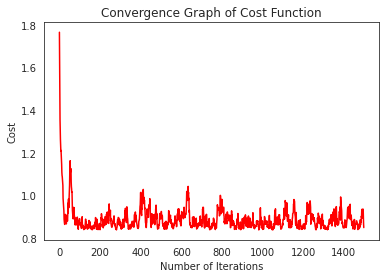

In [ ]:
cost_history, params_optimal = stochastic_gradient_descent(X.values, y.values, params, learning_rate, iterations, C)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

**Задание 4.** Сделайте предсказание обученной модели на всех данных X.

Вычислите долю правильных ответов модели на всех данных X (используйте метрику accuracy).

In [ ]:
from sklearn.metrics import accuracy_score

pred = predict(X, params_optimal)

print(accuracy_score(pred, y))

0.948


**Задание 5**. Визуализируйте данные для задачи (скопируйте код визуализации из начала ноутбука), а также отобразите на нём разделяющую прямую и разделяющую полосу метода. 

In [ ]:
w0 = params_optimal[0]
w1 = params_optimal[1]
w2 = params_optimal[2]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


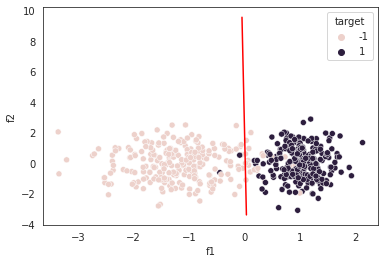

In [ ]:
x = np.linspace(-0.04, 0.04, 100)
y = [-(w0/w2)-(w1/w2)*el for el in x]

sns.set_style('white')
sns.scatterplot(X['f1'], X['f2'], hue = Data['target']);
plt.plot(x,y,c='red')

In [ ]:
x = np.linspace(-1, 1, 100)
y = [-(w0/w2)-(w1/w2)*el for el in x]

w0_1 = w0 - 1
w0_2 = w0 + 1

y_1 = [-(w0_1/w2)-(w1/w2)*el for el in x]
y_2 = [-(w0_2/w2)-(w1/w2)*el for el in x]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


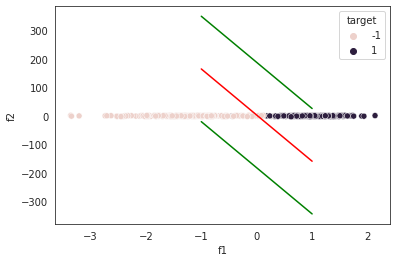

In [ ]:
sns.set_style('white')
sns.scatterplot(X['f1'], X['f2'], hue = Data['target']);
plt.plot(x,y,c='red')

plt.plot(x,y_1,c='green')
plt.plot(x,y_2,c='green')